# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 25480 rows and 12 columns in the dataset.


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* `no_of_employees`, `yr_of_estab`, `prevailing_wage` are the only numerical columns in the data set, float or intiger data types. All the other columns are objects since they are strings. We'll encode some of them later.

In [6]:
# checkinf for missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values.

In [7]:
# checking for duplicate values in the data
print(f"There are {df.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


<IPython.core.display.Javascript object>

In [8]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [9]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

* `case_id` is a unique case identifier. We'll check if it only has unique values, and then drop it.

In [10]:
print(f"There are {df.shape[0]} entries in the dataset")
print(f"There are {df.case_id.nunique()} unique case IDs")


There are 25480 entries in the dataset
There are 25480 unique case IDs


<IPython.core.display.Javascript object>

* We can drop `case_id` since it doesn't have any analytical value.

In [11]:
# Dropping case id
df.drop("case_id", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* `no_of_employees` presents some inconsistencies. The minimum number of employees in the employer's company is negative, that's not possible. We can assume it's an uploading error. We'll find the negative values and turn them into positive.

In [13]:
print(
    f"There are {df.loc[df.no_of_employees < 1].shape[0]} entries with a negative number of emploees"
)

There are 33 entries with a negative number of emploees


<IPython.core.display.Javascript object>

In [14]:
# Fixing `no_of_employees`
df.no_of_employees = abs(df.no_of_employees)
print(
    f"There are {df.loc[df.no_of_employees < 1].shape[0]} entries with a negative number of emploees"
)

There are 0 entries with a negative number of emploees


<IPython.core.display.Javascript object>

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* `no_of_employees` There are all size of companies in the dataset. The min number of employees is 11 and the max is 602069. The mean 5667 but the median is 2109, showing a righ skewed distribution. Of course the standard deviation is huge (22877).
* `yr_of_estab`: the oldest company in the dataset was established in 1800 and the newest in 2016 (the data is from 2016).
* `prevailing_wages`: The average wage minimum salary paid to similarly employed workers for all the dataset 2.1367 dollars (this should be an hourly payment), and the maximum 319210 dollars, we can infer the max salary is being payed yearly. Therefore the avarage salary is not statistically accurate since the Unit of prevailing wage includes values expressed in hours, weeks, months and years.

In [16]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [17]:
# For non numerical columns we can do a counting of unique values to better analyze them.
excl_columns = (
    "no_of_employees",
    "yr_of_estab",
    "prevailing_wage",
)
cat_columns = df.loc[:, ~df.columns.str.startswith(excl_columns)]

<IPython.core.display.Javascript object>

In [18]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts(1))
    print("*" * 50)
    print("")

Unique values in continent are :
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64
**************************************************

Unique values in education_of_employee are :
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64
**************************************************

Unique values in has_job_experience are :
Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64
**************************************************

Unique values in requires_job_training are :
N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64
**************************************************

Unique values in region_of_employment are :
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name

<IPython.core.display.Javascript object>

* `continent` Most of the employees are from Asia 66%, follow by Europe with 14.6%, North America with 12.9%, South America 3.3%, Africa with 2.1% and Oceania with 0.7%.
* `education_of_employee` Most of the employees have a Bachelor's or a Master's degree, 40% and 37% respectively. 13% have a Migh School degree, and only 0.08% a Doctorate.
* `has_job_experience` More than half of the employees have previous job experience (58%), and `requires_job_training` don't require training for the job (88%).
* Considering the `region_of_employment`, employees are almost evenly divided between Nort (28%), South (27%) and West (25%). Then the Midwest comes in forth place as a destination for employees and Island is last (16% and 1.4% respectively).
* `unit_of_wage` The great majority of employees' wages are expressed in yearly payments (90%), but there is also 8% in hours, 1% in weeks and 0.3% in month. This is the reason why the average wage minimum salary paid to similarly employed workers should be analyzed by these categories.
* 89% of the employees are in a `full_time_position`.
* Our target variable `case_status` is divided by 67% Certified, and 33% Denied.

## Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**Continent**

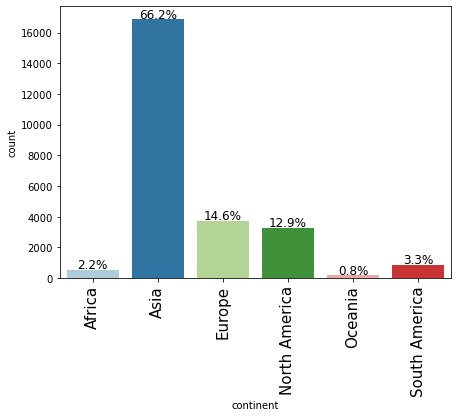

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(df, "continent", perc=True, n=None)

Most of the employees are from Asia 66%, follow by Europe with 14.6%, North America with 12.9%, South America 3.3%, Africa with 2.1% and Oceania with 0.7%.

**Education of Emplyee**

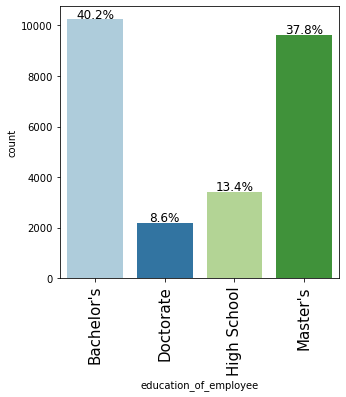

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(df, "education_of_employee", perc=True, n=None)

Most of the employees have a Bachelor's or a Master's degree, 40% and 37% respectively. 13% have a Migh School degree, and only 0.08% a Doctorate.

**Employee Job Experience**

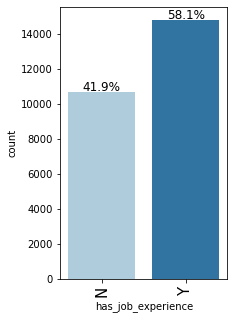

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "has_job_experience", perc=True, n=None)

More than half of the employees have previous job experience (58%).

**Employee Requires Job Training**

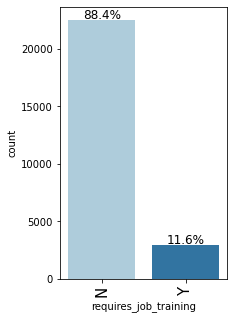

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "requires_job_training", perc=True, n=None)

The great majority of employees don't require training for the job (88%).

**Region of Employment**

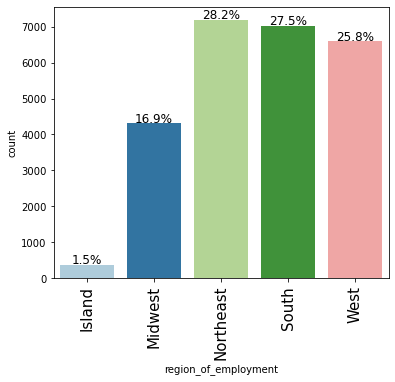

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "region_of_employment", perc=True, n=None)

Employees are almost evenly divided between Nort (28%), South (27%) and West (25%). Then the Midwest comes in forth place as a destination for employees and Island is last (16% and 1.4% respectively).

**Unif of Prevailing Wage**

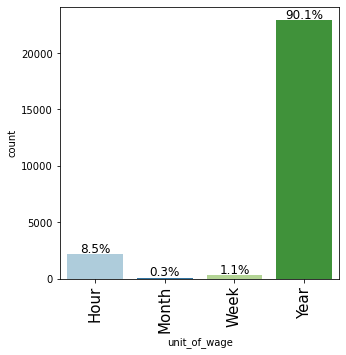

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "unit_of_wage", perc=True, n=None)

Most employees' wages are expressed in yearly payments (90%), but there is also 8% in hours, 1% in weeks and 0.3% in month. This is the reason why the average wage minimum salary paid to similarly employed workers should be analyzed by these categories.

**Full Time Position**

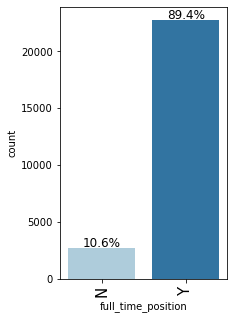

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "full_time_position", perc=True, n=None)

89% of the employees are in a full-time position.

**Case Status**

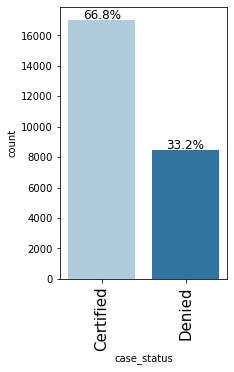

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "case_status", perc=True, n=None)

Our target variable `case_status` is divided by 67% Certified, and 33% Denied.

In [28]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Number of Employees in the Company**

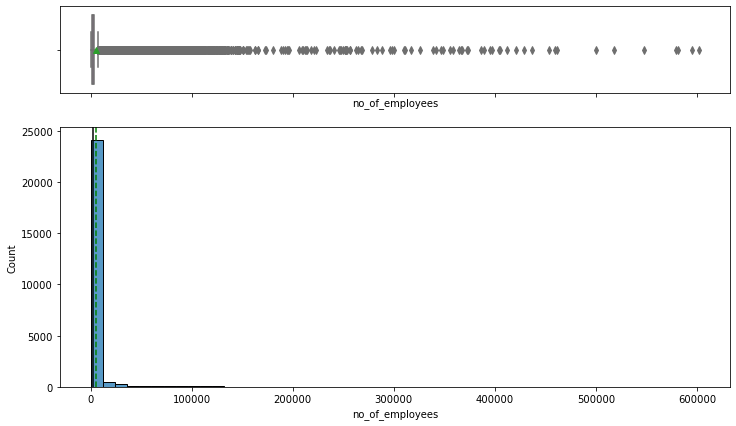

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "no_of_employees", figsize=(12, 7), kde=False, bins=50)

In [30]:
df.no_of_employees.describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

<IPython.core.display.Javascript object>

* As we have already seen in the statistical analysis of the variable, the number of employees in the company is right skewed. 
* The smallest company has only 11 employees and the largest more than 600K. 
* The median is about 2000, and the 75 quartile is 3500, meaning only 25% of the companies have between 3504 and 602069.
* Although the indicator presents many outliers, non of these numbers are inconsistent and therefore we won't treat them.

**Prevailing Wage**

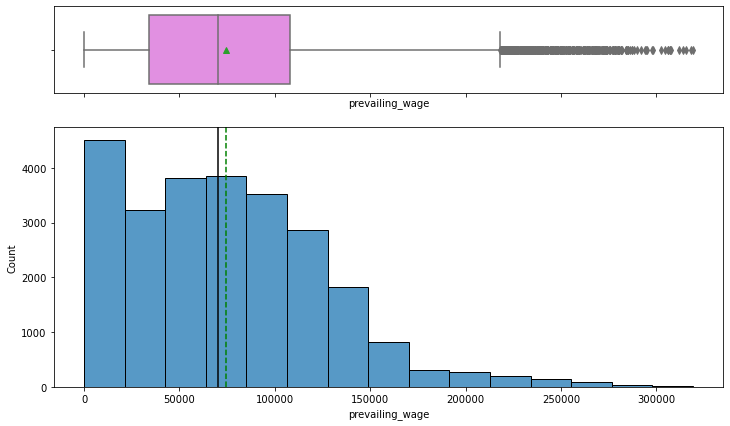

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "prevailing_wage", figsize=(12, 7), kde=False, bins=15)

In [32]:
df.prevailing_wage.describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

* Wages can be expressed in hours, weeks, month and years, therefore the min value is close to 0 while the max value is higher than 300K. 
* Both mean and median values are around 70K, the mean is higher than the median due to the presence of meny outliers on the right side of the distribution.
* There are many outliers on the right side of the distribution, meaning there are some poeple with salaries way higher than the majority of the other employees in the dataset.
* High salaries are not unsual, therefore we won't treat them.

**Established Year**

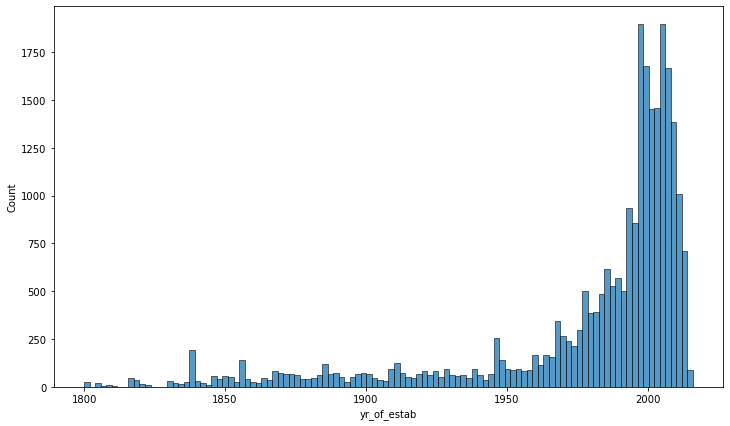

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x="yr_of_estab", palette="winter")
plt.show()

* Although there are some companies that were established more than 200 years ago, most of the companies were established arond the year 2000. We already know that our dataset is from 2016, therefore the newest companies were established that year.

### Bivariate analysis

In [34]:
# Function to plot stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?** 

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


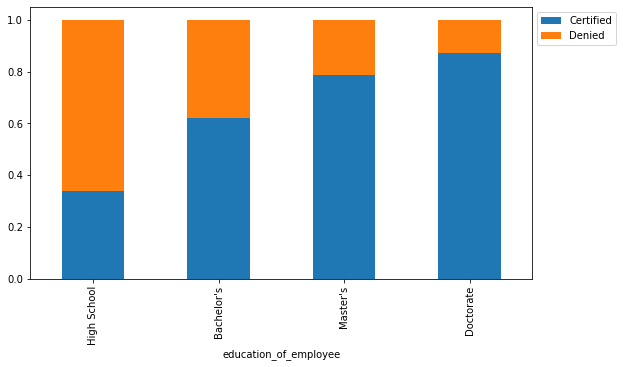

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(df, "education_of_employee", "case_status")

In [37]:
df.groupby("education_of_employee")["case_status"].value_counts(1)

education_of_employee  case_status
Bachelor's             Certified      0.622142
                       Denied         0.377858
Doctorate              Certified      0.872263
                       Denied         0.127737
High School            Denied         0.659649
                       Certified      0.340351
Master's               Certified      0.786278
                       Denied         0.213722
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

* Employees who have achieved higher levels of education present a lower rate of visas denial.
* 62% of the employees with a Phd got their visa approved, while only 34% of the employees with a High School diploma were approved.

**2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


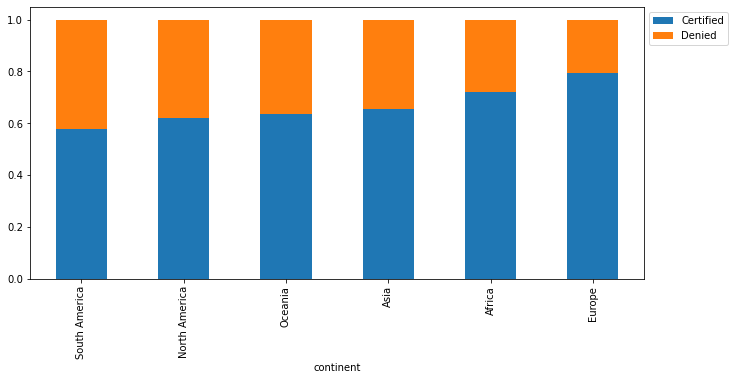

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(df, "continent", "case_status")

* Europe has the highest rate of certified visas (a bit less than 80%), and South America the lowest (60%).
* North America, Oceania, Asia and Africa have a approval rate between 65% and 75% approximately. 

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


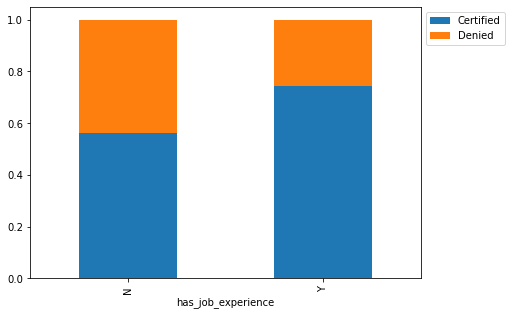

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "has_job_experience", "case_status")

* Employees with previous work experience present higher number of visa approval. The approval rate is close to 0.8, while the approval rate for people without experience is a bit lower than 0.6.

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


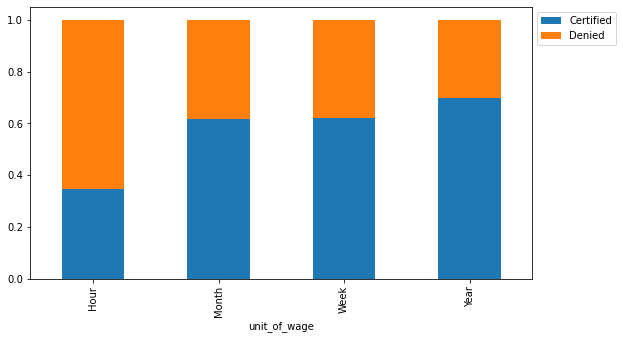

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(df, "unit_of_wage", "case_status")

* Employees who are paid yearly have more chances to get certified, about 70% of yearly-paid applicants were certified.

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

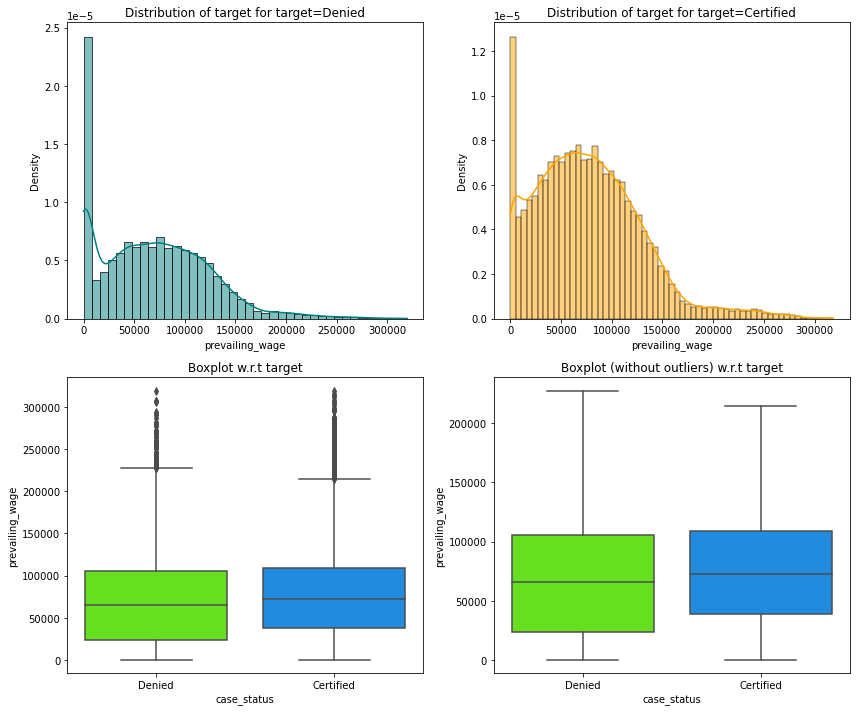

<IPython.core.display.Javascript object>

In [41]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

* Although prevailing wage range for denied cases is more widely spread, the mean prevailing wage is almost the same for Certified and Denied visas. The wage doesn't seem to have an influence over the case status. 

**Prevailing Wage vs Education of Employee by Case Status**

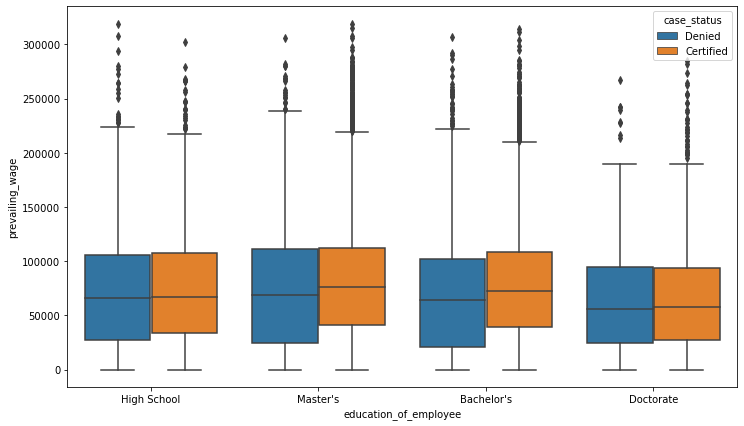

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="education_of_employee", y="prevailing_wage", hue="case_status")
plt.show()

In [43]:
df2 = df.copy()
df2 = df2[["case_status", "prevailing_wage", "education_of_employee"]]
df2.loc[df2.case_status == "Certified"].groupby("education_of_employee").describe()

prevailing_wage                                       \
                                count          mean           std      min   
education_of_employee                                                        
Bachelor's                     6367.0  77399.880153  51161.444446  11.4219   
Doctorate                      1912.0  64558.333989  47320.898205   3.4889   
High School                    1164.0  74926.673079  54991.331571  27.5544   
Master's                       7575.0  80782.520567  52932.894433   2.1367   

                                                                     
                             25%        50%          75%        max  
education_of_employee                                                
Bachelor's             39712.820  72856.780  108335.0700  314156.06  
Doctorate              27391.605  57848.105   93379.3175  285088.16  
High School            33341.765  66885.690  108020.0850  302513.77  
Master's               41355.965  76465.400  112624.9100  318446.05

<IPython.core.display.Javascript object>

In [44]:
df2.loc[df2.case_status == "Denied"].groupby("education_of_employee").describe()

prevailing_wage                                       \
                                count          mean           std      min   
education_of_employee                                                        
Bachelor's                     3867.0  66828.620185  52921.531619   5.1868   
Doctorate                       280.0  64579.805167  53186.088820  16.4637   
High School                    2256.0  69856.515009  53158.378662   2.9561   
Master's                       2059.0  71707.831941  56386.134983   3.0031   

                                                                      
                              25%        50%          75%        max  
education_of_employee                                                 
Bachelor's             21101.2700  64219.170  102312.0650  306982.28  
Doctorate              24663.4925  55951.330   95080.0525  266813.88  
High School            27099.7050  65832.295  105703.1000  319210.27  
Master's               24590.0300  68465.760  110861.4950  306206.67

<IPython.core.display.Javascript object>

* All levels of education, for both certified and denied visas, present outliers on the upper whisker (showing employees with exceptionally high wages). 
* It is curious that the mean wage for all education levels is similiar, and Doctorate looks also a bit lower than the rest. 
* For all levels of educations, certified cases' wage range is less spreaded. The 25 quartile wages for certified cases, are not as low as the lower salaried for denied visas. 
* The higher salaries are similar for both certified and denied, but certified cases present more outliers, except from High School.

**Education of Employee vs Continent**

continent              Africa   Asia  Europe  North America  Oceania  \
education_of_employee                                                  
All                       551  16861    3732           3292      192   
Master's                  288   6480    1097           1408       68   
Bachelor's                143   7168    1299           1225       66   
High School                66   2290     490            401       36   
Doctorate                  54    923     846            258       22   

continent              South America    All  
education_of_employee                        
All                              852  25480  
Master's                         293   9634  
Bachelor's                       333  10234  
High School                      137   3420  
Doctorate                         89   2192  
------------------------------------------------------------------------------------------------------------------------


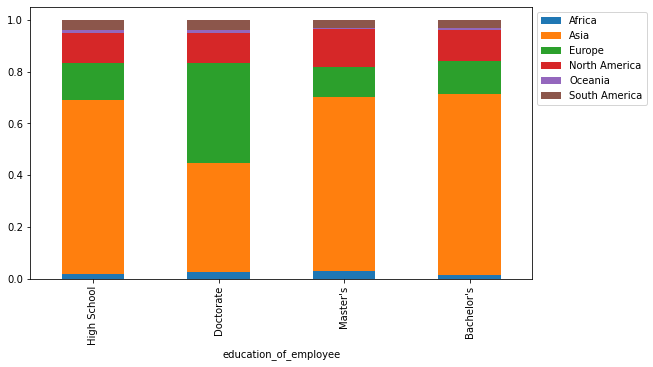

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(df, "education_of_employee", "continent")

* We have seen before that employees with higher levels of education, also have more chances to get certified. 
* Employees with a Doctorate are mostly from Europe and Asia.
* Employees with a Master's are mostly from Asia.
* Employees from Africa, North America, Oceania and South America are almost equally distributed between all education levels.

**Status vs Training Required**

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


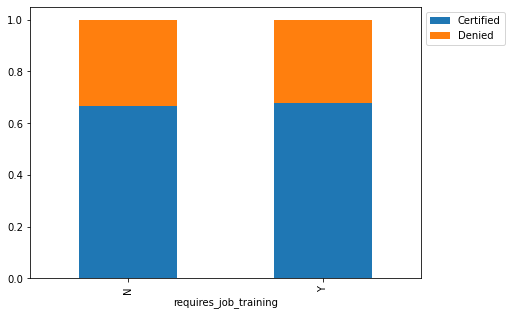

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(df, "requires_job_training", "case_status")

* Certified and Denied cases are evely distributed between people that requires traning and poeple who doesn't.
* `requires_job_training` doesn't seem to have an infleunce over `case_status`

**Status vs Full-Time Position**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


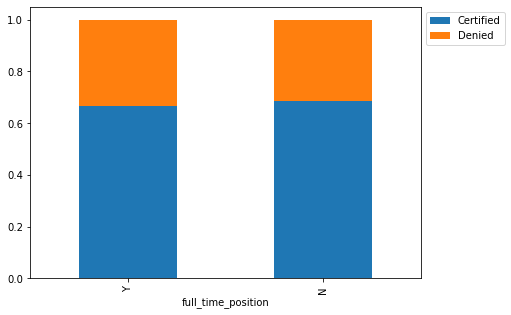

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(df, "full_time_position", "case_status")

* Certified and Denied cases are evely distributed between Full and Part time positions.
* `full_time_position` doesn't seem to have an infleunce over `case_status`

**Status vs Region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


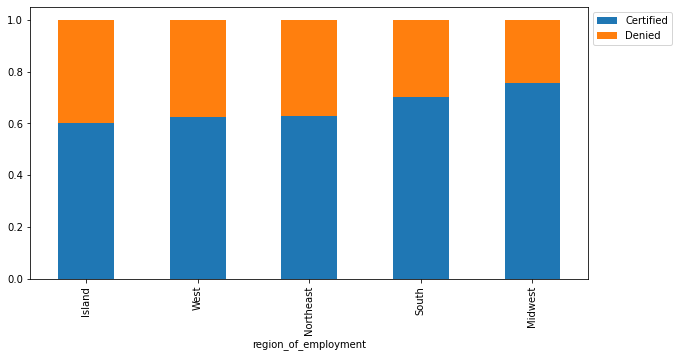

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(df, "region_of_employment", "case_status")

* Although there are no big differences, the region with a higher rate of certification is the Midwest, follow by the South, the Northeast, the West and the Island (these last three presenting almost the same proportion).

**Status vs Number of Employees**

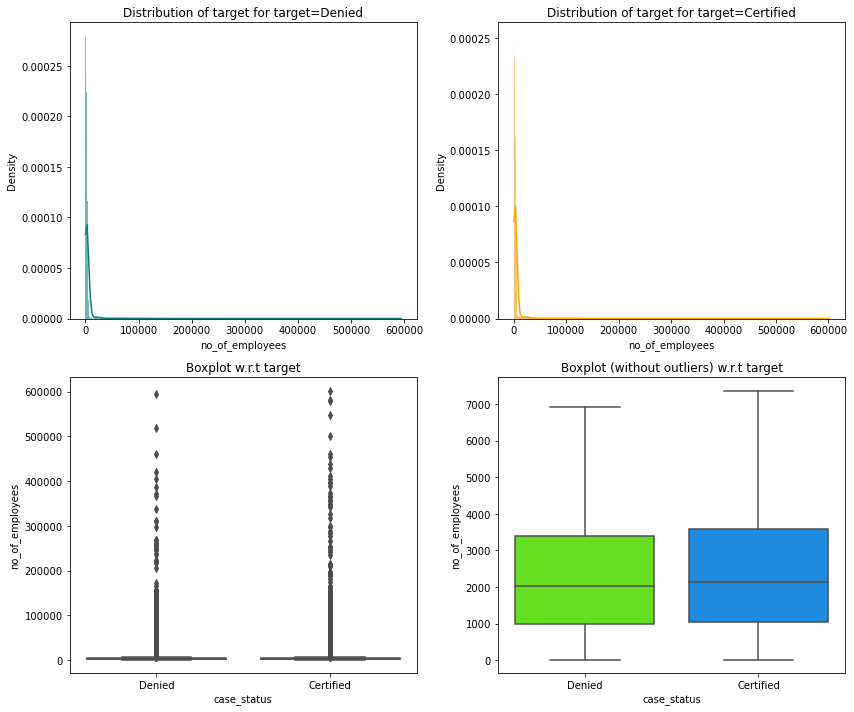

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

* If we observe the boxplot without outliers, we can see the number of employees distribution is almost the same for Denied and Certified cases.
* `no_of_employees` doesn't seem to have an influence over `case_status`.

**Status vs Established Year**

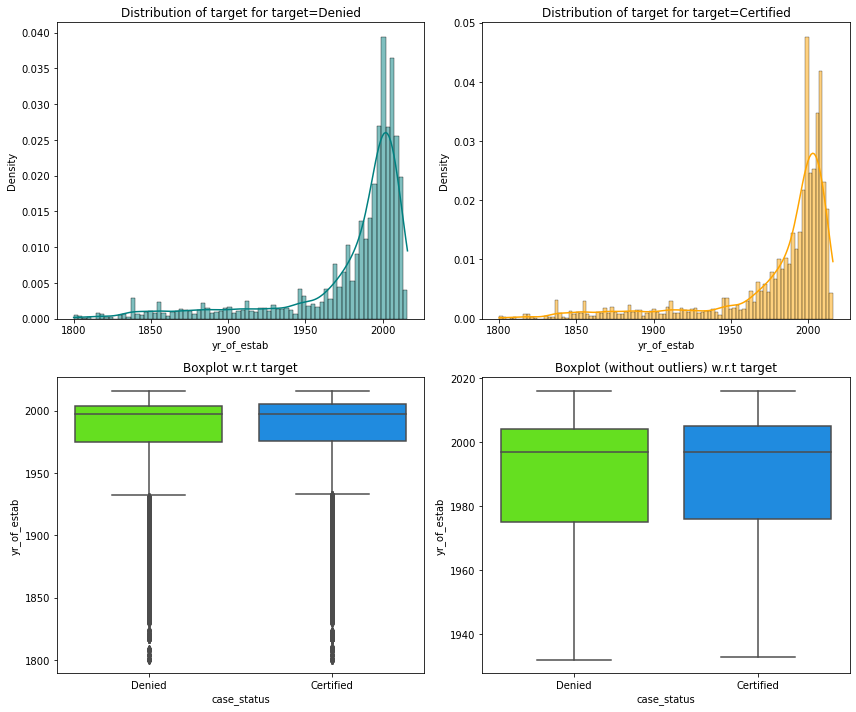

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

* The established year distribution is almost the same for Denied and Certified cases.
* `yr_of_estab` doesn't seem to have an influence over `case_status`.

**Correlation between numeric predictors**

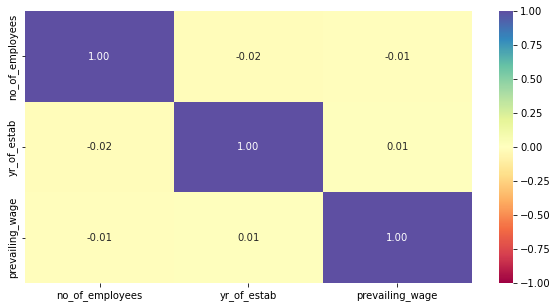

<IPython.core.display.Javascript object>

In [51]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Non of the numeric variables present a meaningful correlation between each other.

## Data Preprocessing

**Outliers detection**

In [52]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

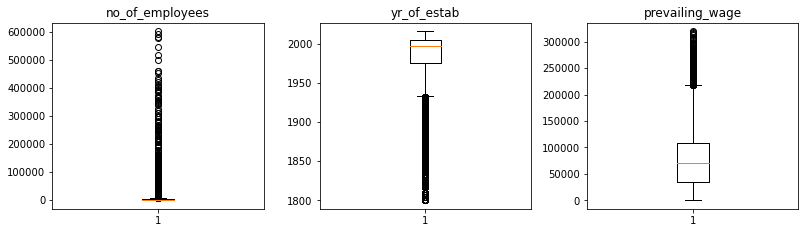

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All numeric variables present outliers, but we have already analyzed them individually and determined they don't need any treatment.

**Before moving forward, we'll encode Yes-No categorical variables and our target variable.**

In [54]:
# Encoding target variable.
# As we want to identify candidates with higher chances of VISA approval, we'll use 1 to encode "Certified"
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [55]:
# Encoding Yes-No categorical variables.
df["has_job_experience"] = df["has_job_experience"].apply(
    lambda x: 1 if x == "Y" else 0
)
df["requires_job_training"] = df["requires_job_training"].apply(
    lambda x: 1 if x == "Y" else 0
)
df["full_time_position"] = df["full_time_position"].apply(
    lambda x: 1 if x == "Y" else 0
)

<IPython.core.display.Javascript object>

In [56]:
df.head(2)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1


<IPython.core.display.Javascript object>

**Preparing Data for Modeling**

In [57]:
# Defining dependent and independent variable
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
# Adding parameter 'stratify' to evenly split the classes between train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)


<IPython.core.display.Javascript object>

In [58]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

#### The model can make wrong predictions as:
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

1. Predicting a visa application will be certified when in realiaty it shouldn't be.
2. Predicting a visa application won't be certified when in really it should be.

#### Which case is more important? 
* Both cases are equally important.
1. If the model predicts a visa application will be certified when it shouldn't, an underqualified candidate will get the chance to have the visa. Other local candidates with better qualifications won't be employed, with negative consequences for both potential candidates and the employers.
2. If the model predicts an application won't be certified but is should, a well qualified candidate won't get the job. Employers will end up hiring someone else with lower qualifications but already authorized to work in the US. The employee will lose the job opportunity and the employer won't get the best human resource for it's company.

#### Which metric to optimize?
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

## Building bagging and boosting models

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [60]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.661695  0.742997   0.748569  0.745773


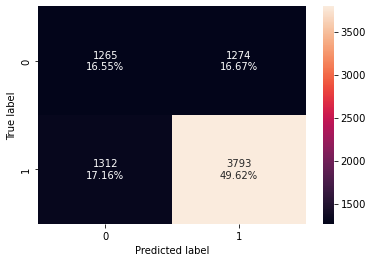

<IPython.core.display.Javascript object>

In [61]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* As expected, the decision tree is overfitting the data.

**Decision Tree: Hyperparameters tuning**

In [62]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [
        {0: 100, 1: 1},
        {0: 10, 1: 1},
        {0: 1, 1: 1},
        {0: 1, 1: 10},
        {0: 1, 1: 100},
    ],
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.730265  0.929489   0.736041  0.821531
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.72292  0.929873   0.729522  0.817602


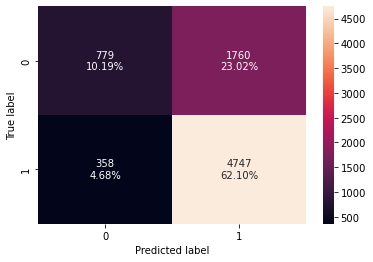

<IPython.core.display.Javascript object>

In [63]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)

dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The model is no longer overfitting the training data.
* F1 score is close to 82%
* Recall is very good: almost 93%
* Accuracy and Precision are both 72%
* Type I error (False Positives) is 23.02%
* Type II error (False Negatives) is 4.68%

### Random Forest Classifier

**Random Forest**

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.722789  0.833888    0.77008  0.800715


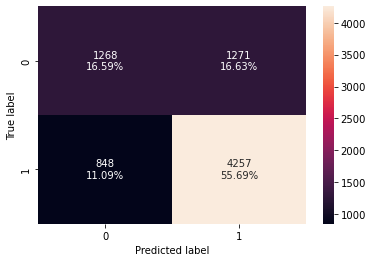

<IPython.core.display.Javascript object>

In [64]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Although performance on test set is better in some aspecets, the model is overfitting the training data.

**Random Forest: Hyperparameters Tuning**

In [65]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, bootstrap=True)

parameters = {
    "class_weight": [{0: 1, 1: 1}, {0: 0.67, 1: 0.33},],
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=10,
                       max_features='sqrt', min_samples_split=7,
                       n_estimators=25, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.771586  0.906489   0.784868  0.841306
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.742282  0.884819   0.765723  0.820974


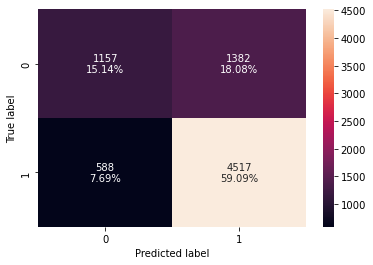

<IPython.core.display.Javascript object>

In [66]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The model is no longer overfitting the training data.
* F1 score is a bit higher than 82% 
* Recall is good 88%, but not as good as the 93% we got with the Tree model.
* Accuracy is 74% and precision 76%, both presenting a better performance than the Tree model.
* Type I error (False Positives) is 18.08% (better than the Tree model)
* Type II error (False Negatives) is 7.69% (a bit worse than the Tree model)

### Bagging Classifier

**Bagging Classifier**

   Accuracy    Recall  Precision        F1
0  0.985255  0.985898   0.991976  0.988928
   Accuracy    Recall  Precision        F1
0  0.695186  0.766112   0.774916  0.770489


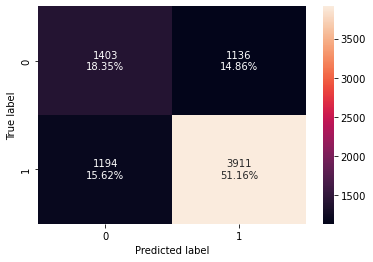

<IPython.core.display.Javascript object>

In [67]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print(bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Performance is not very good and the model is overfitting train data.

**Bagging: Hyperparameters Tuning**

In [68]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.6, 0.8],
    "n_estimators": np.arange(80, 100, 10),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.6, max_samples=0.9, n_estimators=80,
                  random_state=1)

<IPython.core.display.Javascript object>

   Accuracy  Recall  Precision        F1
0  0.999608     1.0   0.999413  0.999706
   Accuracy   Recall  Precision        F1
0  0.729069  0.89951   0.746667  0.815993


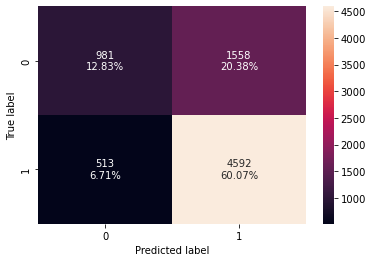

<IPython.core.display.Javascript object>

In [69]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print(bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* Performance has improved but the model is still overfitting the training data. It's not a good model.

### AdaBoost Classifier

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


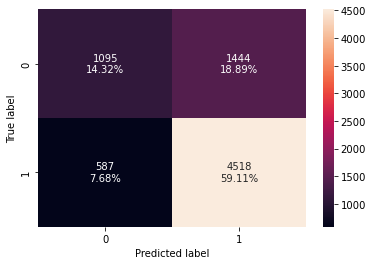

<IPython.core.display.Javascript object>

In [70]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* The model doesn't overfit the data.
* F1 score is 81% for both training and test, a bit lower than the Random Forest model. 
* Recall is good 88%, similar to Random Forest and lower than Tree Model.
* Accuracy is 73% and precision 75%, presenting a similar performance to previous models.
* Type I error (False Positives) is 18.89% (similar to Random Forest Model)
* Type II error (False Negatives) is 7.68% (similar to Random Forest Model)

**AdaBoost: Hyperparameters Tuning**

In [71]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Trying different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(90, 120, 10),
    "learning_rate": np.arange(0.2, 0.5, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1
0  0.753308  0.878536   0.779939  0.826307
   Accuracy    Recall  Precision        F1
0   0.73888  0.870715   0.768898  0.816645


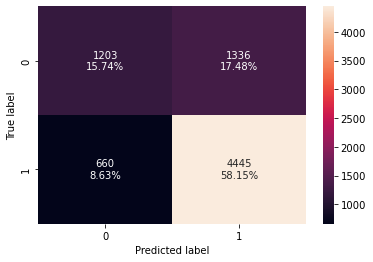

<IPython.core.display.Javascript object>

In [72]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* Model isn't overfitted. 
* Accuracy and Precision have improved.
* Recall is a bit lower than the model without hyperparameters tuning.
* Type I and II errors are similiar to the model without hyperparameters tuning.

### Gradient Boosting

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


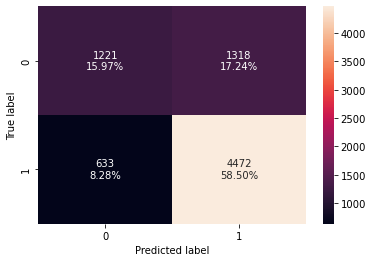

<IPython.core.display.Javascript object>

In [73]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* F1 score is 82%, matching our best F1 score so far. 
* Recall is good 87%, a bit lower but still similar to Random Forest and AdaBoosting models.
* Accuracy is 74% and precision 77%, showing a better performance than previous models.
* Type I error (False Positives) is 17.24% (among the best so far)
* Type II error (False Negatives) is 8.28% (not as good as other models)

**Gradiente Boosting: Hyperparameters Tuning**

In [74]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150, 250],
    "subsample": [0.8, 0.9],
    "max_features": [0.7, 0.8],
    "learning_rate": np.arange(0.1, 0.7, 0.2),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=150, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.760148  0.87862   0.787052  0.830319
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744898  0.868952   0.775931  0.819811


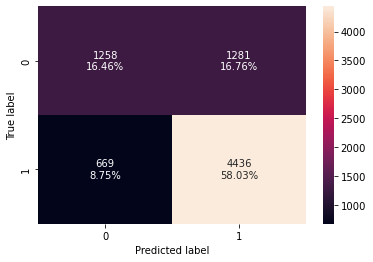

<IPython.core.display.Javascript object>

In [75]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* The performance of the model withouth hyperparameters tuning was better for all measures.

## XGBoost Classifier

**XGBoost Classifier**

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


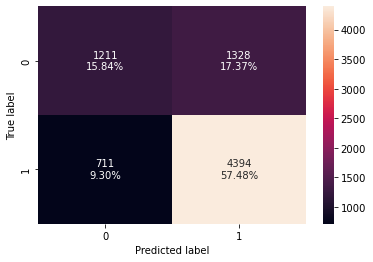

<IPython.core.display.Javascript object>

In [76]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* Performance is good but the model is overfitting the data. Let's see if tuning helps.

**XGBoost Hyperparameters Tuning**

In [77]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9],
    "colsample_bylevel": [0.5, 0.7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.772427  0.886762   0.795841  0.838845
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.74529  0.869736   0.775952  0.820172


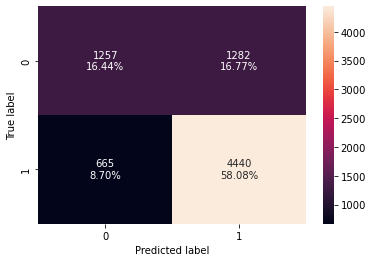

<IPython.core.display.Javascript object>

In [78]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

* Hyperparameters tuning did help to solve overfitting.
* F1 score is 82%, matching our best F1 scores so far. 
* Recall is almost 87%, good and similar to other models.
* Accuracy is 74% and precision 77%, showing a similiar performance to Gradient Boosting model.
* Type I error (False Positives) is 16.77% (among the best so far)
* Type II error (False Negatives) is 8.7% (not as good as other models)

## Stacking Classifier

In [79]:
# Comparing all models on test data to select the models for stacking classifier

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,0.661695,0.722920,0.722789,0.742282,0.695186,0.729069,0.734301,0.738880,0.744767,0.744898,0.733255,0.745290
Recall,0.742997,0.929873,0.833888,0.884819,0.766112,0.899510,0.885015,0.870715,0.876004,0.868952,0.860725,0.869736
Precision,0.748569,0.729522,0.770080,0.765723,0.774916,0.746667,0.757799,0.768898,0.772366,0.775931,0.767913,0.775952
F1,0.745773,0.817602,0.800715,0.820974,0.770489,0.815993,0.816481,0.816645,0.820927,0.819811,0.811675,0.820172


<IPython.core.display.Javascript object>

* We'll use Random Forest (with tuned hyperparameters), Gradient Boosting, Decision Tree, and XGBoost (with tuned hyperparameters) to create our Stacked Model.

In [80]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gb_classifier),
    ("Decision Tree", dtree_estimator),
    ("XGBoost", xgb_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 1,
                                                                     1: 1},
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 1,
                                                                     1: 1},
                                                       max_depth=3,
                                    

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.769175  0.887182    0.79216  0.836983
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.744113  0.870911    0.77416  0.81969


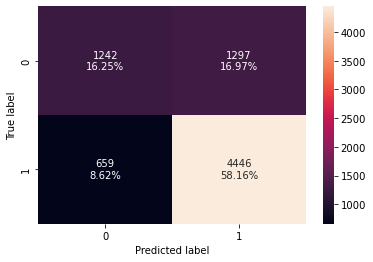

<IPython.core.display.Javascript object>

In [81]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* F1 score is 81.9%, close but not as good as other models. 
* Recall is 87%, good and similar to other models.
* Accuracy is 74% and precision 77%, showing a similiar performance to other models.
* Type I error (False Positives) is 16.97% (good but not the best so far)
* Type II error (False Negatives) is 8.62% (as good as other models)

## Model Performance Comparison and Conclusions

In [82]:
# Comparing all models including stacking classifier
models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.730265,1.0,0.771586,0.985255,0.999608,0.738226,0.753308,0.758802,0.760148,0.838753,0.772427,0.769175
Recall,1.0,0.929489,1.0,0.906489,0.985898,1.000000,0.887182,0.878536,0.883740,0.878620,0.931419,0.886762,0.887182
Precision,1.0,0.736041,1.0,0.784868,0.991976,0.999413,0.760688,0.779939,0.783042,0.787052,0.843482,0.795841,0.792160
F1,1.0,0.821531,1.0,0.841306,0.988928,0.999706,0.819080,0.826307,0.830349,0.830319,0.885272,0.838845,0.836983


<IPython.core.display.Javascript object>

In [83]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.661695,0.722920,0.722789,0.742282,0.695186,0.729069,0.734301,0.738880,0.744767,0.744898,0.733255,0.745290,0.744113
Recall,0.742997,0.929873,0.833888,0.884819,0.766112,0.899510,0.885015,0.870715,0.876004,0.868952,0.860725,0.869736,0.870911
Precision,0.748569,0.729522,0.770080,0.765723,0.774916,0.746667,0.757799,0.768898,0.772366,0.775931,0.767913,0.775952,0.774160
F1,0.745773,0.817602,0.800715,0.820974,0.770489,0.815993,0.816481,0.816645,0.820927,0.819811,0.811675,0.820172,0.819690


<IPython.core.display.Javascript object>

* There are various models with a good and similar performance. 
* Among all of them XGBoost Classifier Tuned and Gradient Boost Classifier are the two best models.
* Gradient Boost Classifier performs a bit better than XGBoost and therefore it will be our final model.

## Features Importance of Final Model: Gradient Boosting

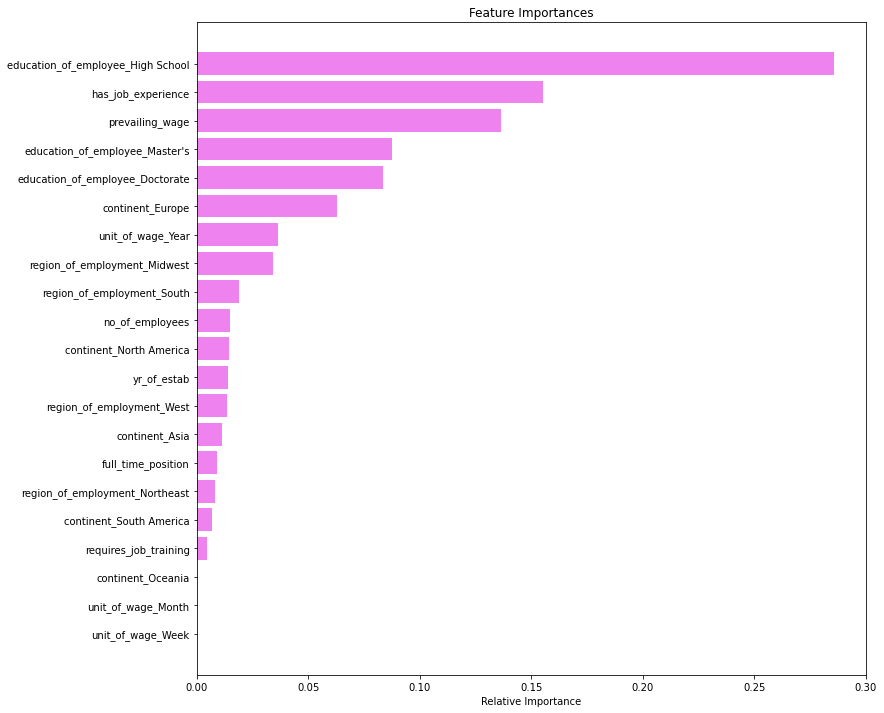

<IPython.core.display.Javascript object>

In [84]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

* There are three variables that present the highest relevance to determine whether a visa is Certified or Denied: education, job experience, and prevailing wage.
* The most important feature is High School education, and then we can find Master's and Doctorate in 4th and 5th place. From our exploratory analysis, we know that employees with High School education have a higher chance of getting their visas denied, and the opposite occure to employees with Master's and Doctorate degrees. Therefore, the client should consider as a first feature for approval if the employee has a High School diploma or a postgraduate degree (Master or Phd). Having the first one entails higher chances of denial.
* The next important feature the client should consider is the employee's previous job experience. In this case, employees who do have experience better fit the profile for getting approved. 
* Prevailing wage is the third feature our client needs to consider. In this case, we know from our previous analysis thatthe 25 quartile varies between Certified and Denied cases, based on their education. For employees that have their visas approved, the 25 quartile wage is  about 39700 USD for a person with a Bachelor's degree, 27300 UDS for a person with a Doctorate, 33300 USD for someone with Hig School diploma, and 41300 for someone with a Master's degree. Consequently, our client could use that base line to know that people under that threshold have really low chances to get certified.
* Other less important features our client should consider are:  `continent` = Europe, `unit_of_wage` = year, and `region_of_employement` = Midwest or South. For these cases, employees coming from Europe are more likely to get certified. We know from our analysis, that this continent also has a high rate of employees with a Doctorate, which is one of the main features that has a positive impact on getting certified. Along the same lines, employees that are paid yearly also should be considered with more chances for certification. Finally, employees with jobs in the Midwest and the South, should also be specially considered for approval. 
* Our client don't need to pay that close attention to the other features in order to decide whether an employee's visa is certified or not.